In [1]:
from preprocess import preprocess_data

df_interpolated, filtered_time_series_columns = preprocess_data('/Users/ns/Downloads/combined_outcome_df.parquet')


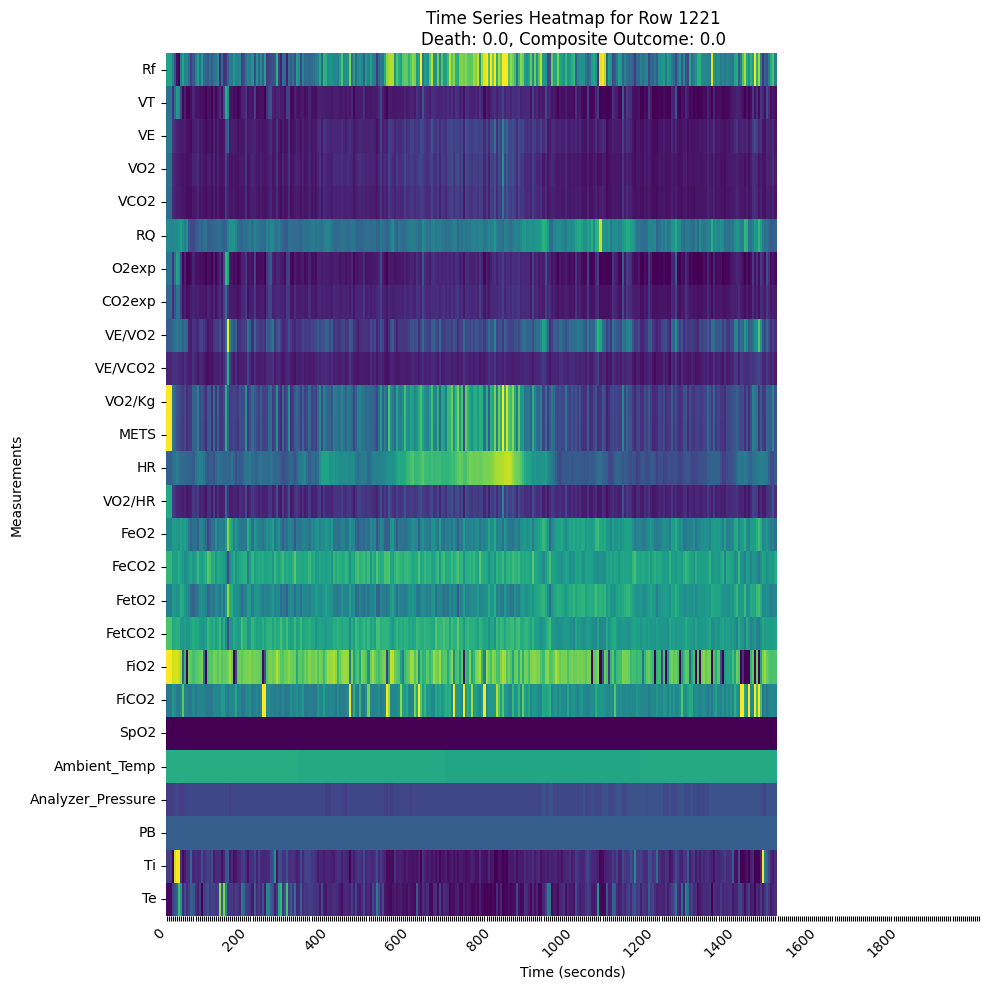

In [8]:
from heatmaps import (get_global_ranges_robust, pad_time_series, 
                     normalize_time_series_data, plot_normalized_heatmap)
import os
def create_and_plot_heatmap(df_interpolated, filtered_time_series_columns, row_idx=None,
                           max_length=400, show_labels=True, show_colorbar=False, output_dir=None, show_plot=True):
    """
    Create normalized heatmap from interpolated time series data and plot it.
    If row_idx is None, creates heatmaps for all rows in the dataframe.
    
    Args:
        df_interpolated: DataFrame with interpolated time series data
        filtered_time_series_columns: List of time series column names
        row_idx: Index of row to plot (default: None, plots all rows)
        max_length: Maximum length to pad/truncate time series (default: 400)
        show_labels: Whether to show axis labels (default: True) 
        show_colorbar: Whether to show colorbar (default: False)
    """
    global_ranges = get_global_ranges_robust(df_interpolated, filtered_time_series_columns)
    df_padded = pad_time_series(df_interpolated, filtered_time_series_columns, max_length)
    df_normalized = normalize_time_series_data(df_padded, filtered_time_series_columns, global_ranges)

    output_filepath = None

    if output_dir is not None:
        os.makedirs(output_dir, exist_ok=True)
    
    if row_idx is not None:
        if output_dir is not None:
            output_filepath = os.path.join(output_dir, f'heatmap_{row_idx}.png')
        plot_normalized_heatmap(df_normalized, row_idx=row_idx,
                              time_series_columns=filtered_time_series_columns,
                              show_labels=show_labels,
                              show_colorbar=show_colorbar, filepath=output_filepath, show_plot=show_plot)
    else:
        total_rows = len(df_normalized.index)
        for idx in range(len(df_normalized.index)):
            if idx % max(1, total_rows // 20) == 0:  # Print every 5%
                print(f"Progress: {idx/total_rows*100:.1f}%")
            if output_dir is not None:
                output_filepath = os.path.join(output_dir, f'heatmap_{idx}.png')
            plot_normalized_heatmap(df_normalized, row_idx=idx,
                                  time_series_columns=filtered_time_series_columns,
                                  show_labels=show_labels,
                                  show_colorbar=show_colorbar, filepath=output_filepath, show_plot=show_plot)
        print("Progress: 100.0%")  # Print final progress

# Create and display the heatmap
create_and_plot_heatmap(df_interpolated, filtered_time_series_columns, row_idx=1221, max_length=400, show_labels=True, show_colorbar=False)

In [9]:
create_and_plot_heatmap(df_interpolated, filtered_time_series_columns, max_length=400, show_labels=False, show_colorbar=False, output_dir='/Users/ns/Downloads/heatmaps', show_plot=False)

Progress: 0.0%
Progress: 5.0%
Progress: 10.0%
Progress: 14.9%
Progress: 19.9%
Progress: 24.9%
Progress: 29.9%
Progress: 34.8%
Progress: 39.8%
Progress: 44.8%
Progress: 49.8%
Progress: 54.8%
Progress: 59.7%
Progress: 64.7%
Progress: 69.7%
Progress: 74.7%
Progress: 79.7%
Progress: 84.6%
Progress: 89.6%
Progress: 94.6%
Progress: 99.6%
Progress: 100.0%
